# Super Resolution Generative Adversarial Network (SRGAN)

## Imports

### wandb (interactive cell)

In [ ]:
!pip -qqq install wandb pytorch-lightning torchmetrics

import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.login()

# API Key:
# d926baa25b6a14ffa4e5c30a6f3bbffbeca8fcf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.9 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### Lightning

In [ ]:
try:
  import lightning.pytorch as pl
except:
  print("[!] Couldn't find pytorch-lightning.\nInstalling it...\n")
  !pip install lightning
  import lightning.pytorch as pl

[!] Couldn't find pytorch-lightning.
Installing it...

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from lightning.pytorch.utilities.model_summary import ModelSummary

In [ ]:
from pytorch_lightning import seed_everything

### standard imports

In [ ]:
import os
import shutil
import pathlib

from PIL import Image
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset

import torchvision
from torchvision import datasets

In [ ]:
import torchvision.transforms as T
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.utils import make_grid

### Albumentations

In [ ]:
try:
  import albumentations as A
  from albumentations.pytorch import ToTensorV2
except:
  print("[!] Couldn't find albumentations... installing it.")
  !pip install -U albumentations
  import albumentations as A
  from albumentations.pytorch import ToTensorV2

### Torchmetrics

In [ ]:
try:
  import torchmetrics
except:
  print(f"[!] Torchmetrics couldn't be imported.\nInstalling...")
  !pip install torchmetrics

### Custom Definitions

In [ ]:
# Folder Utilities ----------------------------

## Create dir if it doesn't exist
def create_dir(dir_name):
  if not os.path.exists(f'/content/{dir_name}'):
    os.mkdir(f'/content/{dir_name}')

## Delete dir: checkpoints
def delete_dir(dir_name):
  if os.path.isdir(f'/content/{dir_name}'):
    shutil.rmtree(f'/content/{dir_name}')

# ---------------------------------------------

## Config File, Seeds & Devices

In [ ]:
# Log this config file to wandb
CONFIG = dict(
    seed=42,
    DATA_ROOT = '/content/',
    BATCH_SIZE = 32,
    WORKERS = 2,
    IMG_SIZE = (3,96,96),
    NUM_EPOCHS = 20,
    nz=100,
    lr = 0.0003,
    nc = 1,  
    disc_steps=1,
    checkpoint_path='/content/checkpoints/'
    )

In [ ]:
seed_everything(CONFIG['seed'])

INFO:lightning_fabric.utilities.seed:Global seed set to 42


42

In [ ]:
# device = torch.device('cpu')
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

## Transforms

In [ ]:
# train_transform = A.Compose(
#     [
#         A.SmallestMaxSize(max_size=160),
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
#         A.RandomCrop(height=128, width=128),
#         A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
#         A.RandomBrightnessContrast(p=0.5),
#         A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#         ToTensorV2(),
#     ]
# )

## Dataset

In [ ]:
!unzip sr_dataset_kaggle.zip

Archive:  sr_dataset_kaggle.zip
  inflating: Data/HR/0.png           
  inflating: Data/HR/1.png           
  inflating: Data/HR/10.png          
  inflating: Data/HR/11.png          
  inflating: Data/HR/12.png          
  inflating: Data/HR/13.png          
  inflating: Data/HR/14.png          
  inflating: Data/HR/15.png          
  inflating: Data/HR/16.png          
  inflating: Data/HR/17.png          
  inflating: Data/HR/18.png          
  inflating: Data/HR/19.png          
  inflating: Data/HR/2.png           
  inflating: Data/HR/20.png          
  inflating: Data/HR/21.png          
  inflating: Data/HR/22.png          
  inflating: Data/HR/23.png          
  inflating: Data/HR/24.png          
  inflating: Data/HR/25.png          
  inflating: Data/HR/26.png          
  inflating: Data/HR/27.png          
  inflating: Data/HR/28.png          
  inflating: Data/HR/29.png          
  inflating: Data/HR/3.png           
  inflating: Data/HR/30.png          
  inflating: Data/

In [ ]:
class SRDataset(Dataset):
  def __init__(self, root_dir: str = None, 
               low_transform = Compose([ToTensor()]), 
               high_transform = Compose([ToTensor()])):
               
    super().__init__()
    self.root_dir = root_dir
    self.high_dir = list(os.listdir(root_dir+"HR/"))
    self.low_dir = list(os.listdir(root_dir+"LR/"))
    self.ht = high_transform
    self.lt = low_transform

  def __getitem__(self, idx):
    high_img = Image.open(self.root_dir+"HR/"+self.high_dir[idx])
    low_img = Image.open(self.root_dir+"LR/"+self.low_dir[idx])

    high_img = self.ht(high_img)
    low_img = self.lt(low_img)

    return (low_img, high_img)

  def __len__(self):
    return max(len(self.high_dir), len(self.low_dir))

In [ ]:
srdata = SRDataset(root_dir = '/content/Data/', 
                   low_transform=Compose([Resize((32,32)), ToTensor()]),
                   high_transform=Compose([Resize((32*4, 32*4), ToTensor()]))

## Sanity Viz

In [ ]:
low, high = next(iter(srdata))
print(low.shape, low.dtype, low.device)

torch.Size([3, 96, 96]) torch.float32 cpu


In [ ]:
low_img = np.asarray(low.permute(1,2,0))
high_img = np.asarray(high.permute(1,2,0))

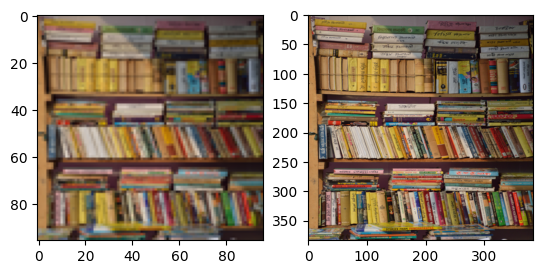

In [ ]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(low_img)
axarr[1].imshow(high_img)

## DataLoader

In [ ]:
train_dataloader = DataLoader(srdata, batch_size=1, shuffle=True)

In [ ]:
low, high = next(iter(train_dataloader))

In [ ]:
def show(imgs, ttle=""):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = T.functional.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        axs[0, i].set_title(ttle)

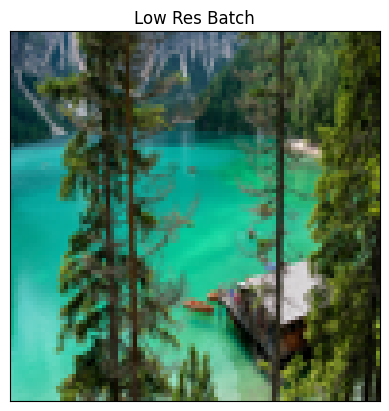

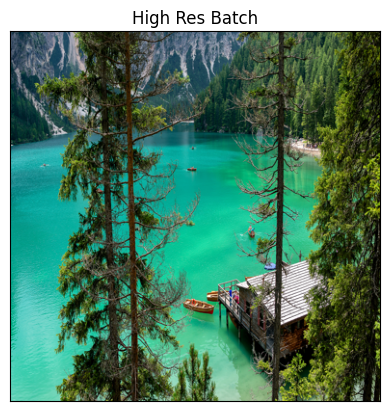

In [ ]:
low_grid, high_grid = make_grid(low), make_grid(high)
show(low_grid, "Low Res Batch")
show(high_grid, "High Res Batch")

## Model Arch

In [ ]:
from torchvision import models
from torchsummary import summary

### Discriminator


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_shape):
        super(Discriminator, self).__init__()

        self.input_shape = input_shape
        in_channels, in_height, in_width = self.input_shape
        patch_h, patch_w = int(in_height / 2 ** 4), int(in_width / 2 ** 4)
        self.output_shape = (1, patch_h, patch_w)

        def discriminator_block(in_filters, out_filters, first_block=False):
            layers = []
            layers.append(nn.Conv2d(in_filters, out_filters, kernel_size=3, stride=1, padding=1))
            if not first_block:
                layers.append(nn.BatchNorm2d(out_filters))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            layers.append(nn.Conv2d(out_filters, out_filters, kernel_size=3, stride=2, padding=1))
            layers.append(nn.BatchNorm2d(out_filters))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        layers = []
        in_filters = in_channels
        for i, out_filters in enumerate([64, 128, 256, 512]):
            layers.extend(discriminator_block(in_filters, out_filters, first_block=(i == 0)))
            in_filters = out_filters

        layers.append(nn.Conv2d(out_filters, 1, kernel_size=3, stride=1, padding=1))

        self.model = nn.Sequential(*layers)

    def forward(self, img):
        return self.model(img)

In [ ]:
d = Discriminator(input_shape=CONFIG['IMG_SIZE']).to(device)
summary(d, (3,384,384))

OutOfMemoryError: ignored

### Generator

In [ ]:
from torchvision.models import vgg19

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        vgg19_model = vgg19(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(vgg19_model.features.children())[:18])

    def forward(self, img):
        return self.feature_extractor(img)

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super(ResidualBlock, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_features, in_features, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_features, 0.8),
            nn.PReLU(),
            nn.Conv2d(in_features, in_features, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_features, 0.8),
        )

    def forward(self, x):
        return x + self.conv_block(x)


class ResGen(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, n_residual_blocks=16):
        super(ResGen, self).__init__()

        self.conv1 = nn.Sequential(nn.Conv2d(in_channels, 64, kernel_size=9, stride=1, padding=4), nn.PReLU())
        # Residual blocks
        res_blocks = []
        for _ in range(n_residual_blocks):
            res_blocks.append(ResidualBlock(64))
        self.res_blocks = nn.Sequential(*res_blocks)
        self.conv2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(64, 0.8))

        # Upsampling 
        upsampling = []
        for out_features in range(2):
            upsampling += [
                # nn.Upsample(scale_factor=2),
                nn.Conv2d(64, 256, 3, 1, 1),
                nn.BatchNorm2d(256),
                nn.PixelShuffle(upscale_factor=2),
                nn.PReLU(),
            ]
        self.upsampling = nn.Sequential(*upsampling)

        # Final layer
        self.conv3 = nn.Sequential(nn.Conv2d(64, out_channels, kernel_size=9, stride=1, padding=4), nn.Tanh())

    def forward(self, x):
        out1 = self.conv1(x)
        out = self.res_blocks(out1)
        out2 = self.conv2(out)
        out = torch.add(out1, out2)
        out = self.upsampling(out)
        out = self.conv3(out)
        return out

In [ ]:
g = ResGen().to(device)
summary(g, (3, 96, 96))

OutOfMemoryError: ignored

## Lightning Recipe

In [ ]:
class LIT_SRGAN(pl.LightningModule):
  
  def __init__(self, 
               discriminator_model, 
               generator_model, 
               feature_extractor,
               lr: float = 0.003,
               b1: float = 0.5,
               b2: float = 0.999, 
               disc_steps: int = 1):
    
    super().__init__()

    self.save_hyperparameters(ignore=[discriminator_model, 
                                      generator_model, 
                                      feature_extractor])
    
    self.automatic_optimization = False

    self.discriminator = discriminator_model
    self.generator = generator_model
    self.feature_extractor = feature_extractor

    self.criterion_GAN = nn.MSELoss()
    self.criterion_content = nn.L1Loss() 
  
  def configure_optimizers(self):
    lr = self.hparams.lr
    b1 = self.hparams.b1
    b2 = self.hparams.b2

    optim_g = torch.optim.Adam(self.generator.parameters(), lr=lr, betas=(b1,b2))
    optim_d = torch.optim.Adam(self.discriminator.parameters(), lr=lr, betas=(b1,b2))

    return [optim_g, optim_d], []


  def forward(self, z):
    return self.generator(z)


  def training_step(self, batch, batch_idx):
    img_low, img_high = batch

    img_low, img_high = img_low.to(device), img_high.to(device)
   
    valid = torch.ones(img_low.size(0), *self.discriminator.output_shape).to(device)
    fake = torch.zeros(img_low.size(0), *self.discriminator.output_shape).to(device)

    self.feature_extractor.eval()
    # print(f"{batch_idx}:: imgs.shape =",imgs.shape)
    opt_g, opt_d = self.optimizers()

    # Train G:
    self.toggle_optimizer(opt_g)

    gen_high = self.generator(img_low)
    loss_GAN = self.criterion_GAN(self.discriminator(gen_high), valid)

    # Content loss
    gen_features = self.feature_extractor(gen_high)
    real_features = self.feature_extractor(img_high)
    loss_content = self.criterion_content(gen_features, real_features.detach())

    # Total loss
    g_loss = loss_content + 1e-3 * loss_GAN

    # Grad step:
    self.manual_backward(g_loss)
    opt_g.step()
    opt_g.zero_grad()

        
    self.untoggle_optimizer(opt_g)

    # Train Discriminator
    self.toggle_optimizer(opt_d)

    for i in range(self.hparams.disc_steps): # 5 (from WGAN paper)
      # Discriminator loss:
      d_loss_real = self.criterion_GAN(self.discriminator(img_high), valid)
      d_loss_fake = self.criterion_GAN(self.discriminator(gen_high.detach()), fake)

      d_loss = (d_loss_fake + d_loss_real) / 2.

      # self.log("d_loss", d_loss, prog_bar=True)
      self.manual_backward(d_loss)
      opt_d.step()

      opt_d.zero_grad()
    self.untoggle_optimizer(opt_d)
      
    self.logger.experiment.log({"Gen_Image (during training)":[wandb.Image(gen_high[0].cpu(), caption="High Res. Output")]})
    self.log_dict({"g_loss": g_loss, "d_loss": d_loss}, 
                  on_step=True, 
                  on_epoch=True, 
                  prog_bar=True, 
                  logger=True)


In [ ]:
srgan = LIT_SRGAN(
      discriminator_model = Discriminator(input_shape=CONFIG['IMG_SIZE']), 
      generator_model = ResGen(),
      feature_extractor =  FeatureExtractor(),
      lr=CONFIG['lr'])

summary = ModelSummary(srgan, max_depth=-1)
print(summary)

## Logger: Proj, Run ... Names

In [ ]:
wandb_logger = WandbLogger(project='M7-SRGAN', 
                           name='exp-1_20epochs',
                           config=CONFIG,
                           job_type='train',
                           log_model="all")

## Trainer Callbacks

In [ ]:
from pytorch_lightning import Callback
from lightning.pytorch.callbacks import DeviceStatsMonitor, TQDMProgressBar, ModelCheckpoint, EarlyStopping, LearningRateMonitor

# Checkpoint
checkpoint_callback = ModelCheckpoint(dirpath=CONFIG['checkpoint_path'],
                                      filename='{epoch}-{g_loss:.3f}',
                                      monitor='g_loss',
                                      save_top_k=-1,
                                      save_last=True,
                                      save_weights_only=True,
                                      verbose=True,
                                      mode='min')

# Exp2: Learning Rate Monitor
lr_monitor = LearningRateMonitor(logging_interval='step', log_momentum=False)

# Earlystopping
# earlystopping = EarlyStopping(monitor='val_d_acc', patience=3, mode='min')

## Trainer

In [ ]:
trainer = pl.Trainer(fast_dev_run=False,    # For debugging purposes
                     log_every_n_steps=1,   # set the logging frequency
                     accelerator='auto',    # Precedence: tpu > gpu >> cpu
                     devices="auto",        # all
                     max_epochs= 20,         # CONFIG['NUM_EPOCHS'],
                     callbacks=[TQDMProgressBar(refresh_rate=25), 
                                checkpoint_callback, 
                                lr_monitor],
                     logger=wandb_logger,    # wandb <3
                     )

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


## Training

In [ ]:
trainer.fit(srgan, train_dataloader)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:44: UserWarning: attribute 'discriminator_model' removed from hparams because it cannot be pickled
  rank_zero_warn(f"attribute '{k}' removed from hparams because it cannot be pickled")
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:44: UserWarning: attribute 'generator_model' removed from hparams because it cannot be pickled
  rank_zero_warn(f"attribute '{k}' removed from hparams because it cannot be pickled")
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:44: UserWarning: attribute 'feature_extractor' removed from hparams because it cannot be pickled
  rank_zero_warn(f"attribute '{k}' removed from hparams because it cannot be pickled")


OutOfMemoryError: ignored

## Call Finish on Exp logger

In [ ]:
wandb.finish()